In [41]:
%load_ext autoreload
%autoreload
import cv2
import matplotlib.pyplot as plt
path = "testrom.png"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pic = cv2.imread(path, 0)

In [3]:
pic = (pic - 255) % 255

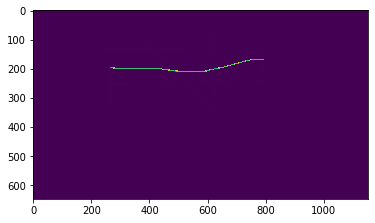

In [4]:
plt.imshow(pic)

In [5]:
import numpy as np

In [6]:
A = np.array([[0, 1,0], [1, 4,1],[0,1,0]])
b = np.array([[0, 0], [0, 0]])

In [9]:
import scipy

In [10]:
arr = np.ones((1000,1000))

In [11]:
lap = [[0.25, 0.5, 0.25],[0.5,-3,0.5],[0.25,0.5,0.25]]

In [12]:
from scipy import signal

In [13]:
test_conv = signal.convolve(arr, lap)

In [14]:
test_conv.shape

(1002, 1002)

In [15]:
B = np.ones_like(test_conv)

In [16]:
B[623:633, 193:203] = 100

In [17]:
sol = np.linalg.solve(test_conv, B)

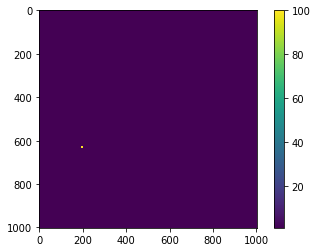

In [18]:
plt.imshow(B)
plt.colorbar()

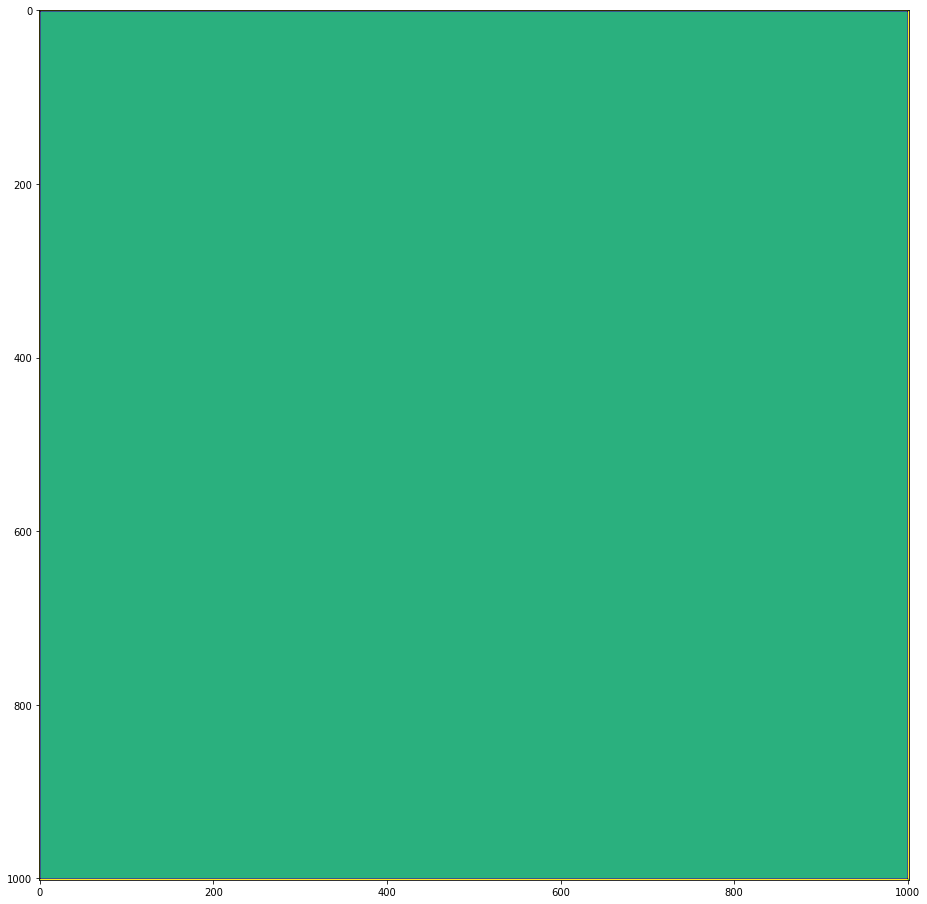

In [19]:
fig = plt.figure(figsize=(16, 16))
p = plt.imshow(test_conv)

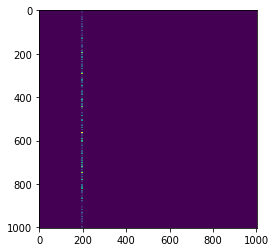

In [20]:
plt.imshow(np.abs(sol))

In [21]:
np.abs(sol)

array([[1.13045035e+13, 1.13045035e+13, 1.13045035e+13, ...,
        1.13045035e+13, 1.13045035e+13, 1.13045035e+13],
       [3.04341653e+12, 3.04341653e+12, 3.04341653e+12, ...,
        3.04341653e+12, 3.04341653e+12, 3.04341653e+12],
       [2.95321022e+14, 2.95321022e+14, 2.95321022e+14, ...,
        2.95321022e+14, 2.95321022e+14, 2.95321022e+14],
       ...,
       [2.88513179e+14, 2.88513179e+14, 2.88513179e+14, ...,
        2.88513179e+14, 2.88513179e+14, 2.88513179e+14],
       [8.07260634e+12, 8.07260634e+12, 8.07260634e+12, ...,
        8.07260634e+12, 8.07260634e+12, 8.07260634e+12],
       [1.88480628e+11, 1.88480628e+11, 1.88480628e+11, ...,
        1.88480628e+11, 1.88480628e+11, 1.88480628e+11]])

In [22]:
b.shape

(2, 2)

# Teste scorefunksjoner

In [25]:
p = (np.random.randint(0,N-1), np.random.randint(0,N-1))

In [67]:
from score import *
%autoreload

In [90]:
N = 1000
g = gauss_(N)
m = np.mean(g)

In [91]:
%time ws = basic_score(g)
%time ss = step_score(g,m)
ws, ss

Wall time: 2.15 ms
Wall time: 7.77 ms


(0.7316665544817711, 0.42069889899042145)

In [98]:
g.shape

(1000, 1000)

In [96]:
g[g>m].shape

(489844,)

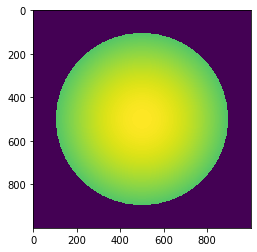

In [100]:
plt.imshow(np.where(g>m,g,0))